# Plotting the Result of ACO for TSP
In this notebook, different plots for the result of ant colony optimization algorithm for traveling salesperson problem is presented. This includes comparisons between the serial version of the algorithm and the parallel version, and the effect of different parameters on the performance of the algorithm.

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import SubplotSpec
from kneed import KneeLocator

# Set the matplotlib figures dpi to 300
plt.rcParams['figure.dpi'] = 300

## Plotting the Result of Serial and Parallel

In [2]:
ENV = "../../env"
MPI_RESULT = os.path.join(ENV, "out-32p-4t", "result.csv")
MPI_METADATA = os.path.join(ENV, "out-32p-4t", "metadata.csv")
SER_RESULT = os.path.join(ENV, "out-1p", "result.csv")
SER_METADATA = os.path.join(ENV, "out-1p", "metadata.csv")

MPI_EXCL_RESULT = os.path.join(ENV, "out-32p-4t-excl", "result.csv")
MPI_EXCL_METADATA = os.path.join(ENV, "out-32p-4t-excl", "metadata.csv")
SER_EXCL_RESULT = os.path.join(ENV, "out-1p-excl", "result.csv")
SER_EXCL_METADATA = os.path.join(ENV, "out-1p-excl", "metadata.csv")

In [3]:
df_ser = pd.read_csv(SER_RESULT)
df_ser_metadata = pd.read_csv(SER_METADATA)
best_path_ser = df_ser.groupby('iteration')['pathLength'].min().reset_index()

min_val = best_path_ser['iteration'].min()
max_val = best_path_ser['iteration'].max()

time_ser = df_ser_metadata["elapsedTime"][0] / 1000.0
best_path_ser['time'] = (best_path_ser['iteration'] - min_val) / (max_val - min_val) * time_ser


df_mpi = pd.read_csv(MPI_RESULT)
df_mpi_metadata = pd.read_csv(MPI_METADATA)
best_path_mpi = df_mpi.groupby('iteration')['pathLength'].min().reset_index()

min_val = best_path_mpi['iteration'].min()
max_val = best_path_mpi['iteration'].max()

time_mpi = df_mpi_metadata["elapsedTime"][0]
best_path_mpi['time'] = (best_path_mpi['iteration'] - min_val) / (max_val - min_val) * time_mpi

In [4]:
df_ser_excl = pd.read_csv(SER_EXCL_RESULT)
df_ser_excl_metadata = pd.read_csv(SER_EXCL_METADATA)
best_path_ser_excl = df_ser_excl.groupby('iteration')['pathLength'].min().reset_index()

min_val = best_path_ser_excl['iteration'].min()
max_val = best_path_ser_excl['iteration'].max()

time_ser = df_ser_excl_metadata["elapsedTime"][0] / 1000.0
best_path_ser_excl['time'] = (best_path_ser_excl['iteration'] - min_val) / (max_val - min_val) * time_ser


df_mpi_excl = pd.read_csv(MPI_EXCL_RESULT)
df_mpi_excl_metadata = pd.read_csv(MPI_EXCL_METADATA)
best_path_mpi_excl = df_mpi_excl.groupby('iteration')['pathLength'].min().reset_index()

min_val = best_path_mpi_excl['iteration'].min()
max_val = best_path_mpi_excl['iteration'].max()

time_mpi = df_mpi_excl_metadata["elapsedTime"][0]
best_path_mpi_excl['time'] = (best_path_mpi_excl['iteration'] - min_val) / (max_val - min_val) * time_mpi

### Plotting the Result Based on Iteration

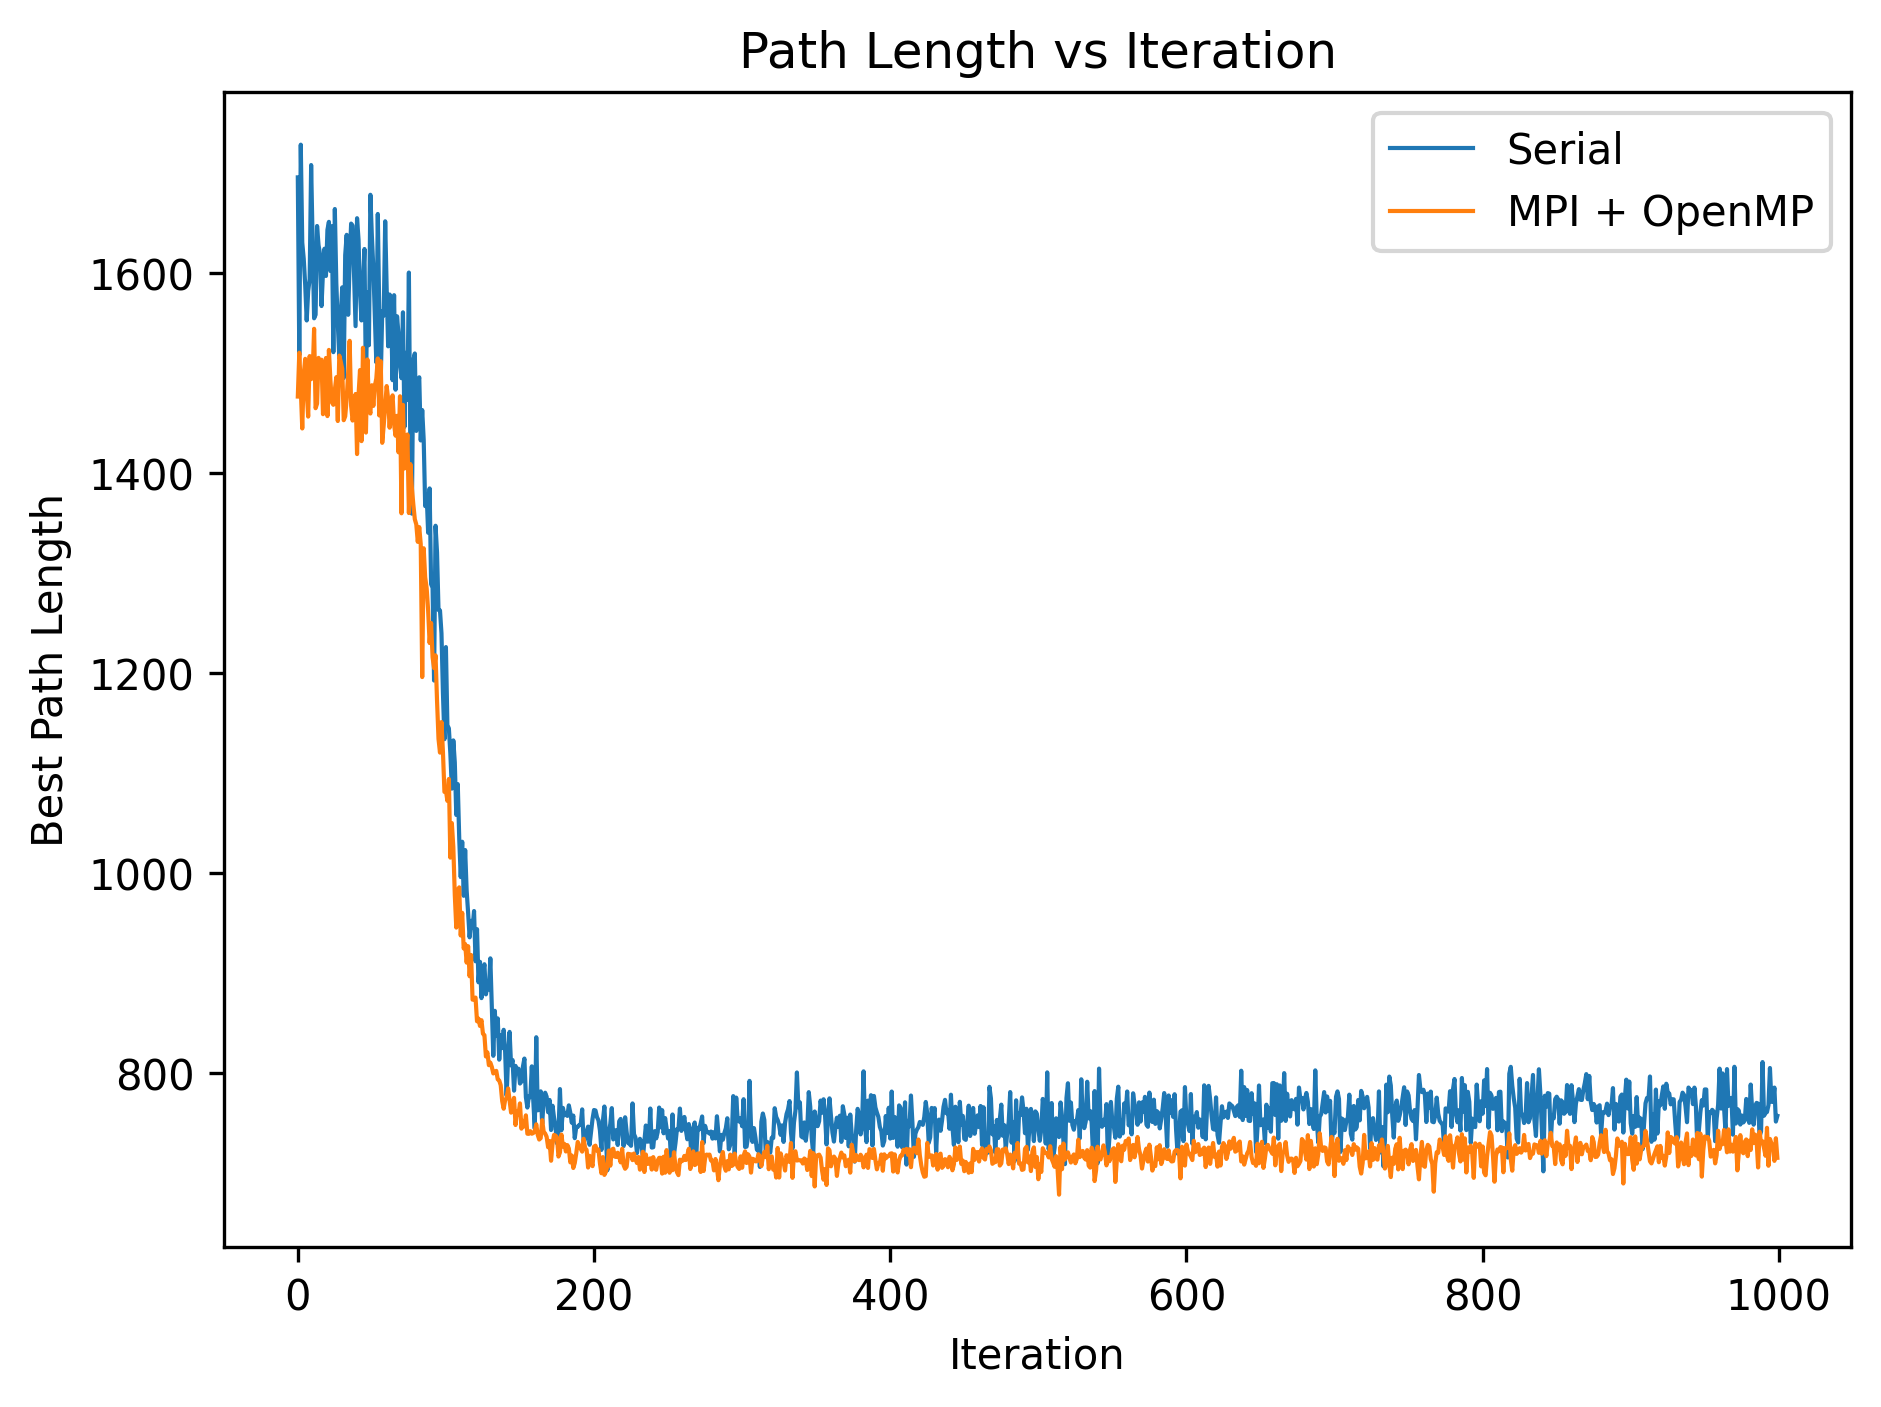

In [5]:
# plot the result
linewidth = 1

plt.figure(figsize=(7, 5))
plt.plot(best_path_ser['iteration'], best_path_ser['pathLength'], label='Serial', linewidth=linewidth)
plt.plot(best_path_mpi['iteration'], best_path_mpi['pathLength'], label='MPI + OpenMP', linewidth=linewidth)
xmin, xmax = 0, best_path_mpi['iteration'].max()
padding = abs(xmax - xmin) * 0.05
plt.xlim(left=xmin - padding, right=xmax + padding)
plt.xlabel('Iteration')
plt.ylabel('Best Path Length')
plt.title('Path Length vs Iteration')
plt.legend()

plt.savefig("pathLength_iteration.png", transparent=True, bbox_inches='tight', dpi=300)
plt.show()

### Plotting the Result Based on Time

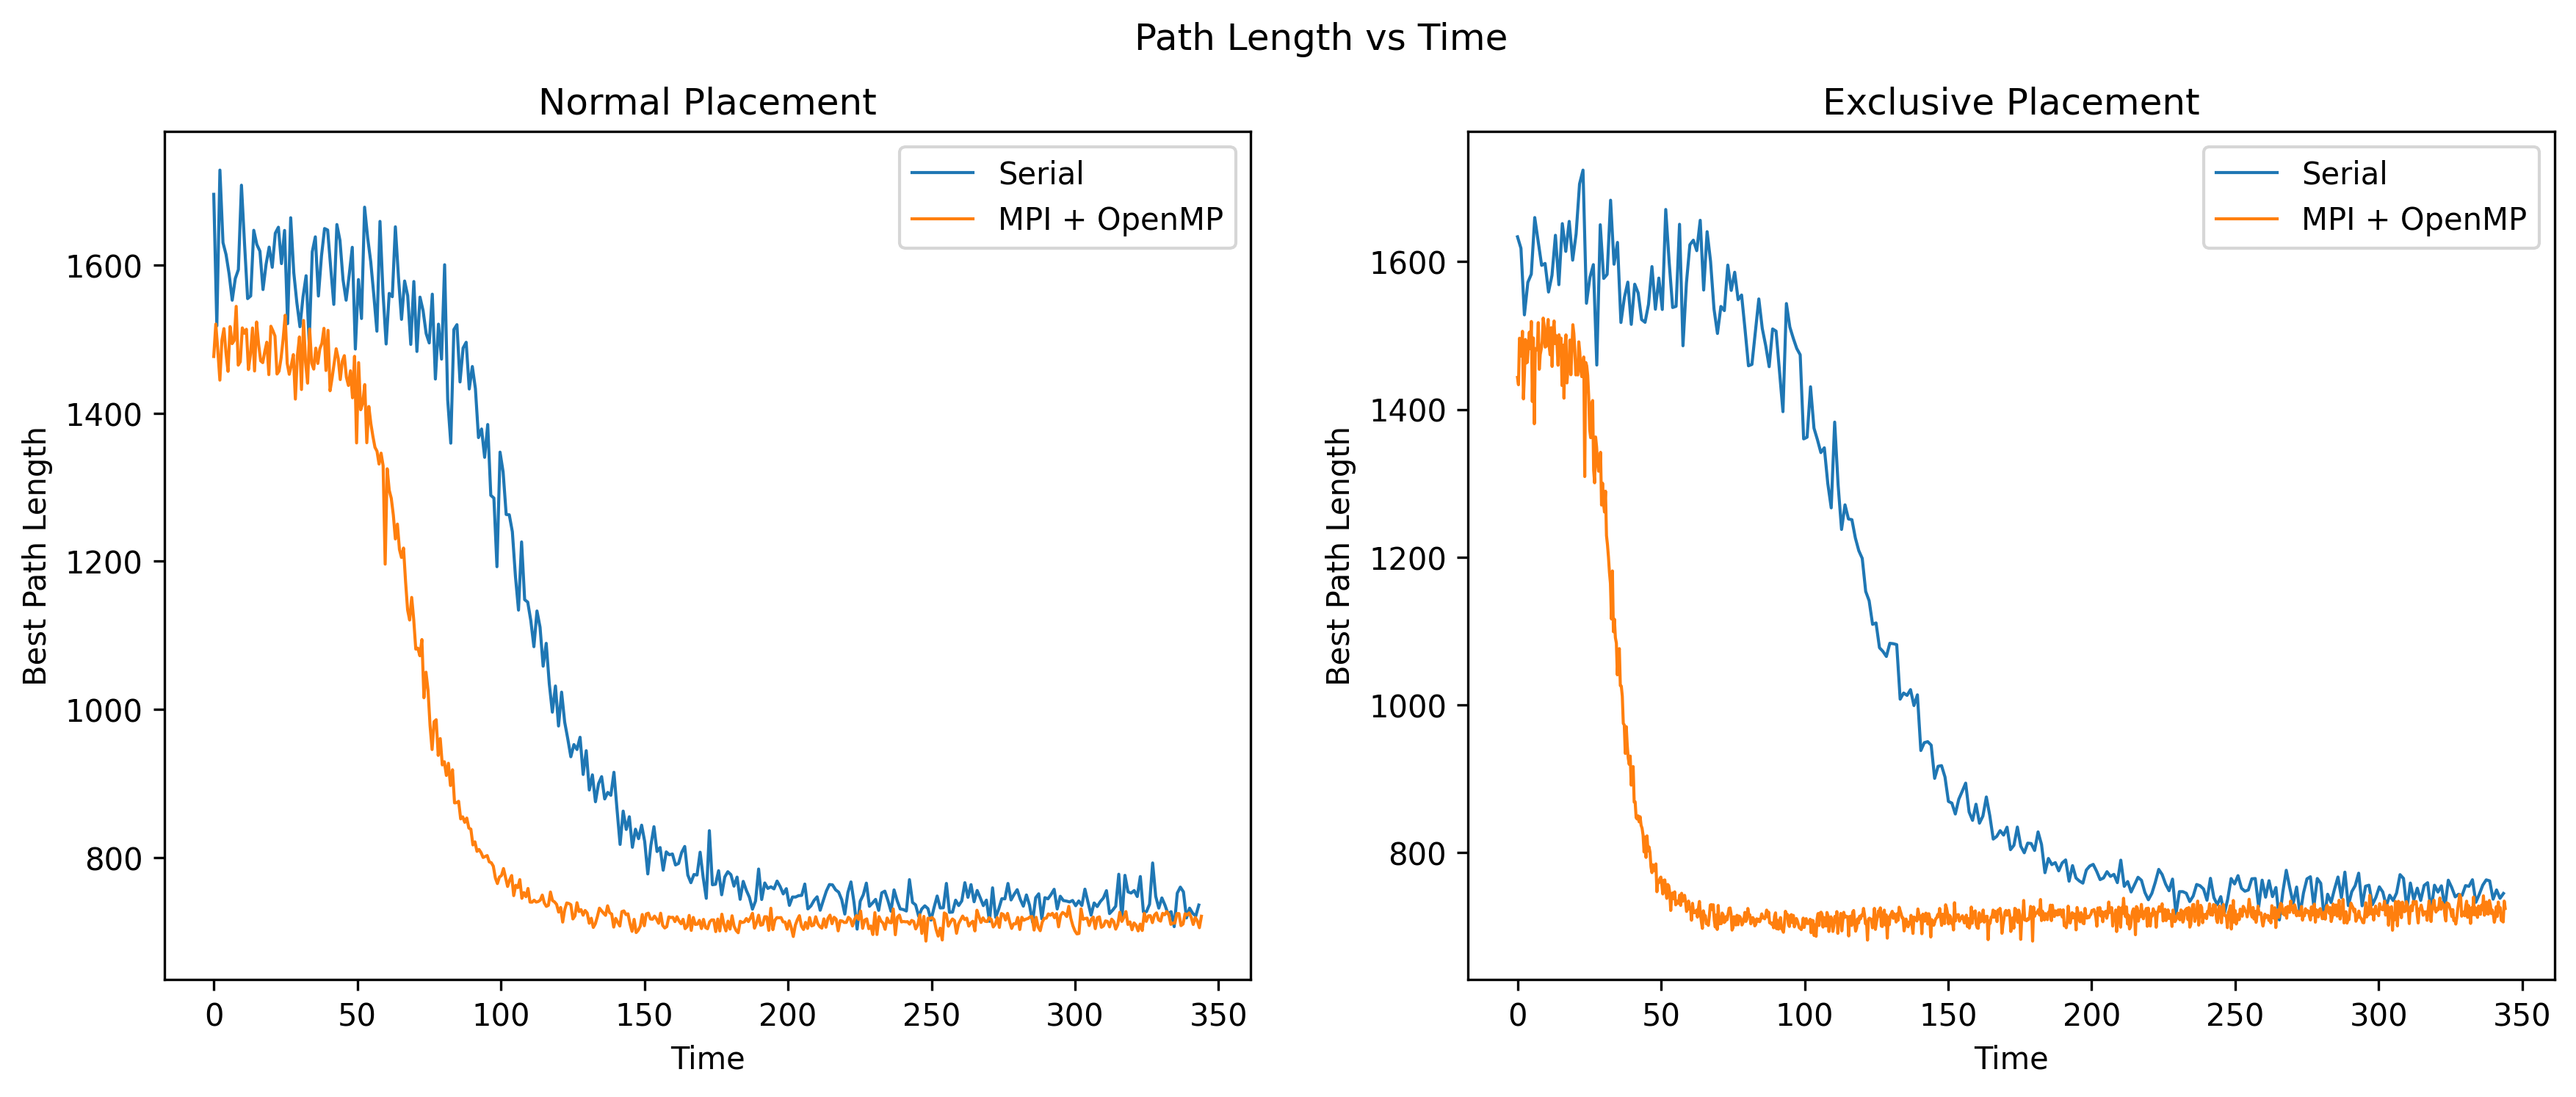

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Path Length vs Time')

xmin, xmax = 0, min(time_ser, time_mpi)
mask_mpi = best_path_mpi["time"] > xmax
mask_ser = best_path_ser["time"] > xmax

axs[0].plot(best_path_ser[~mask_ser]['time'], best_path_ser[~mask_ser]['pathLength'], label='Serial', linewidth=linewidth)
axs[0].plot(best_path_mpi[~mask_mpi]['time'], best_path_mpi[~mask_mpi]['pathLength'], label='MPI + OpenMP', linewidth=linewidth)

padding = abs(xmax - xmin) * 0.05
axs[0].set_xlim(left=xmin - padding, right=xmax + padding)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Best Path Length')
axs[0].set_title('Normal Placement')
axs[0].legend()

xmin, xmax = 0, min(time_ser, time_mpi)
mask_mpi = best_path_mpi_excl["time"] > xmax
mask_ser = best_path_ser_excl["time"] > xmax

axs[1].plot(best_path_ser_excl[~mask_ser]['time'], best_path_ser_excl[~mask_ser]['pathLength'], label='Serial', linewidth=linewidth)
axs[1].plot(best_path_mpi_excl[~mask_mpi]['time'], best_path_mpi_excl[~mask_mpi]['pathLength'], label='MPI + OpenMP', linewidth=linewidth)

padding = abs(xmax - xmin) * 0.05
axs[1].set_xlim(left=xmin - padding, right=xmax + padding)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Best Path Length')
axs[1].set_title('Exclusive Placement')
axs[1].legend()

plt.savefig("pathLength_time.png", transparent=True, bbox_inches='tight', dpi=300)
plt.show()